In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('Walmart_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
pd.options.display.float_format = '{:,.0f}'.format

In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

# Checking Missing values

In [10]:
data.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [11]:
# checking duplicates
data.duplicated().sum()

0

# Feature Engineering

In [12]:
# Correcting the date format
data['date'] = pd.to_datetime(data['date'], format = "%d-%m-%Y")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [14]:
import calendar
data['year'] = data['date'].dt.year

In [15]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010


In [16]:
data['quarter'] = data['date'].dt.quarter
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1


In [17]:
data['quarter'].value_counts()

3    1800
2    1755
1    1485
4    1395
Name: quarter, dtype: int64

In [18]:
def Sesson_getter(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

In [19]:
data['season'] = data['quarter'].apply(Sesson_getter)
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter


In [20]:
data['season'].value_counts()

Summer    1800
Spring    1755
Winter    1485
Fall      1395
Name: season, dtype: int64

In [21]:
data['month'] = data['date'].dt.month
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3


In [21]:
data['month_name'] = data['date'].dt.month_name()

In [22]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March


In [23]:
data['month_name'].value_counts()

month_name
April        630
July         630
March        585
June         585
August       585
September    585
October      585
February     540
May          540
December     450
November     360
January      360
Name: count, dtype: int64

In [24]:
data['week'] = data['date'].dt.isocalendar().week
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9


In [25]:
data['day_of_week'] = data['date'].dt.day_name()
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9,Friday


In [26]:
data.shape

(6435, 15)

# Exploratory Data Analysis (EDA)
- Univariate Analysis
- Bi-variate Analysis
- Time Series Analysis

### Univariate Analysis
#### Numerical Features
- weekly sales
- temperature
- fuel price
- cpi
- unemployment

In [27]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'month_name', 'week', 'day_of_week'],
      dtype='object')

In [28]:
data[['weekly_sales','temperature','fuel_price', 'cpi', 'unemployment']].describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,172,8
std,"564,367",18,0,39,2
min,"209,986",-2,2,126,4
25%,"553,350",47,3,132,7
50%,"960,746",63,3,183,8
75%,"1,420,159",75,4,213,9
max,"3,818,686",100,4,227,14


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

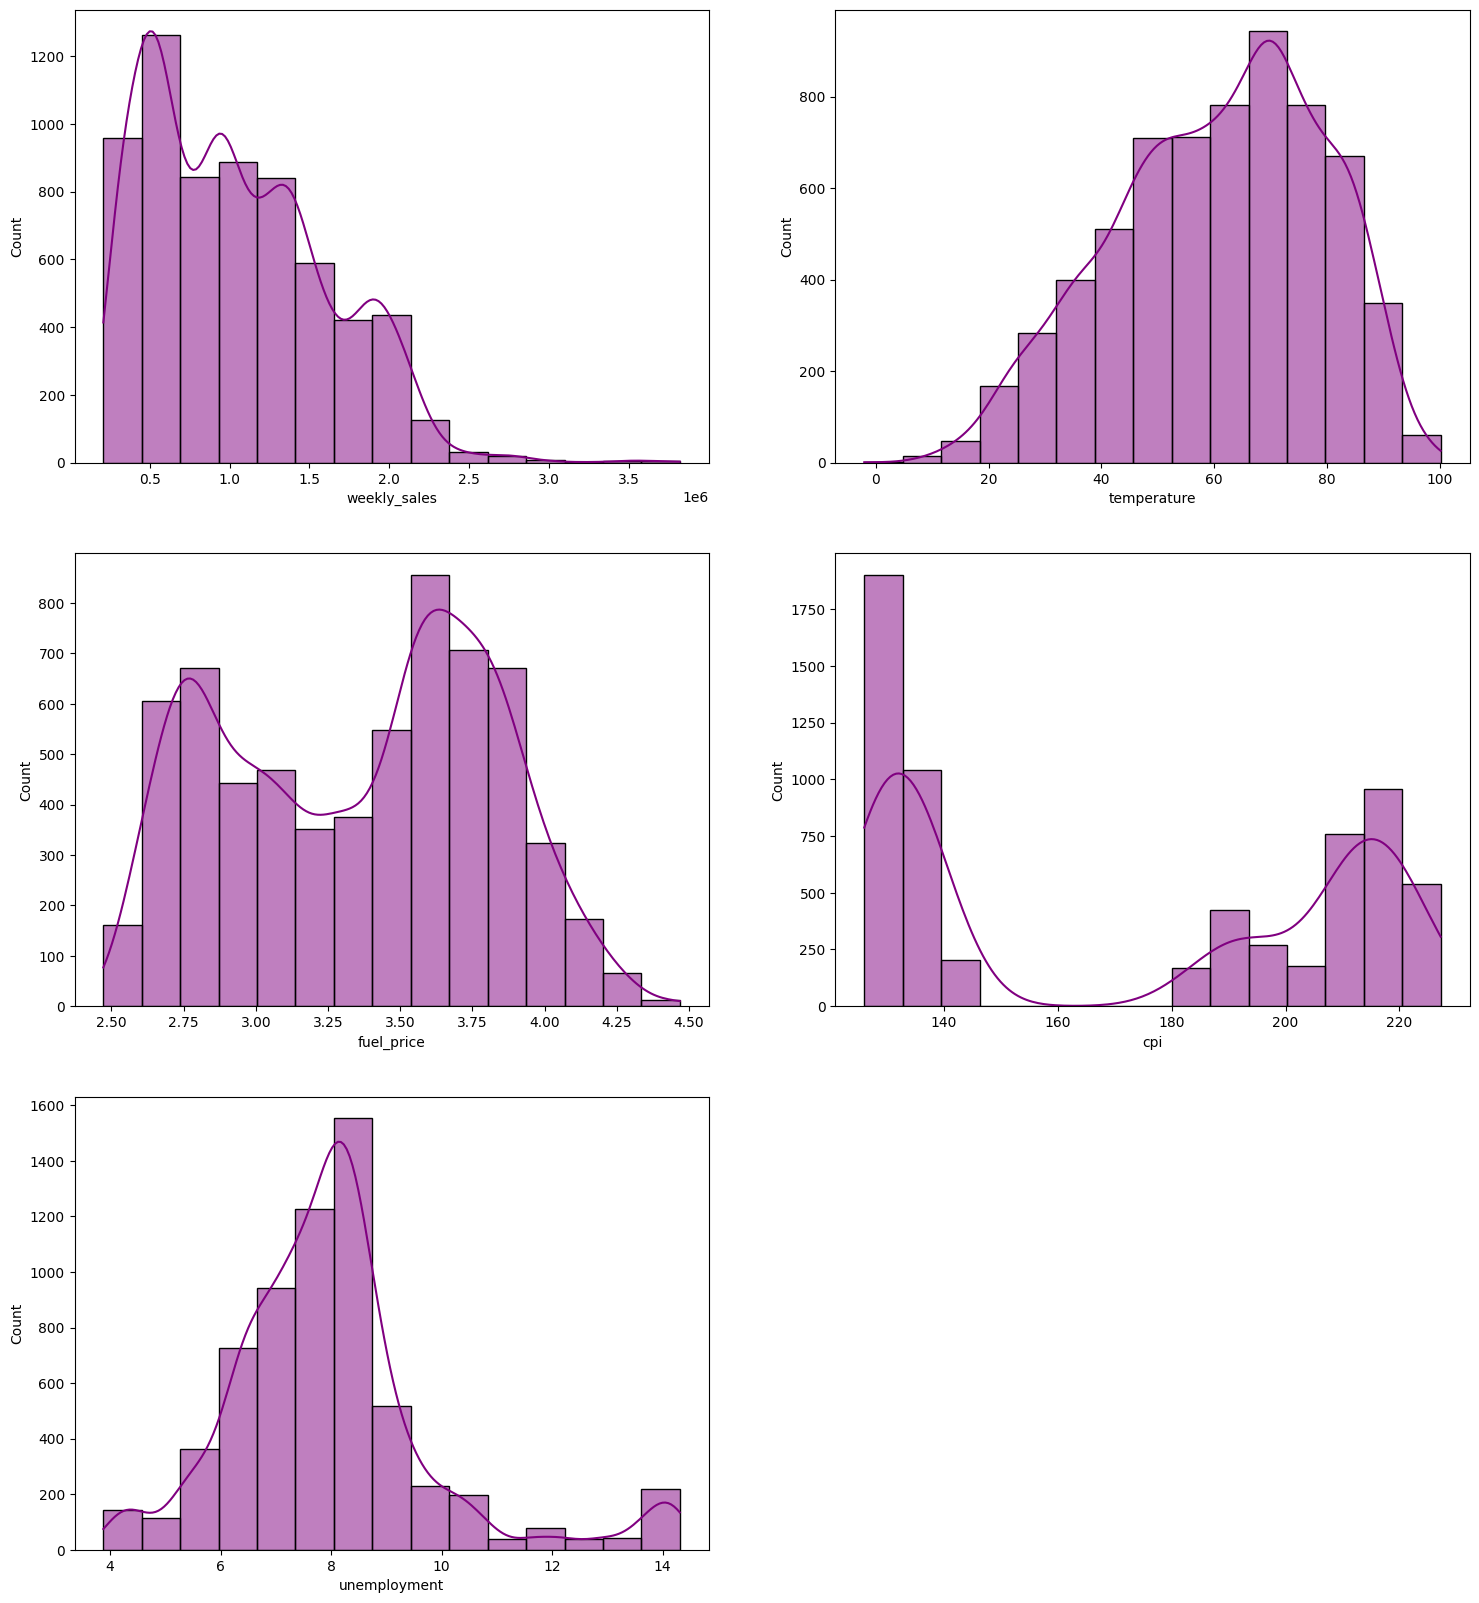

In [29]:
columns = ['weekly_sales','temperature','fuel_price', 'cpi', 'unemployment']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, bins = 15, color = 'purple')
plt.show()

#### Conclusion:
- weekly_sales is right skewed
- Temp and unemployment are normal dist.
- rests are bimodal